In [1]:
import numpy as np
import src

In [2]:
# from jupyterthemes import jtplot
# jtplot.style(theme='onedork', context='notebook')

# Друга задача, неадаптивні алгоритми

In [3]:
def ProjectionOntoProbabilitySymplex(x: np.array) -> np.array:
    """ computes projection onto (scaled) a probability symplex """
    dimensionality = x.shape[0]
    x /= dimensionality
    sorted_x = np.flip(np.sort(x))
    prefix_sum = np.cumsum(sorted_x)
    to_compare = sorted_x + (1 - prefix_sum) / np.arange(1, dimensionality + 1)
    k = 0
    for j in range(1, dimensionality):
        if to_compare[j] > 0:
            k = j
    return dimensionality * np.maximum(np.zeros(dimensionality), x +
                                       (to_compare[k] - sorted_x[k]))

In [4]:
tolerance = 1e-3
sizes = (100, 200, 500, 1000)
algos = ('Корпелевич', 'Tseng', 'Кеш. Tseng', 'Попов', 'Кеш. Попов',
         'Маліцький Tam', 'Кеш. Маліцький Tam')

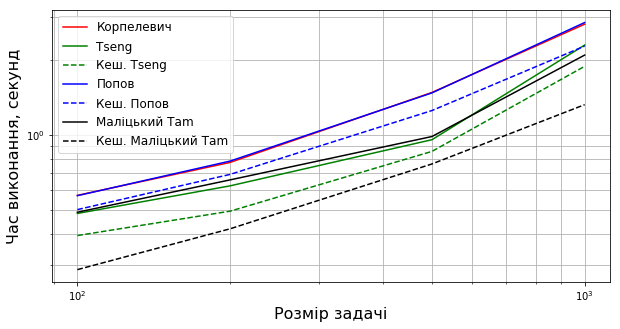

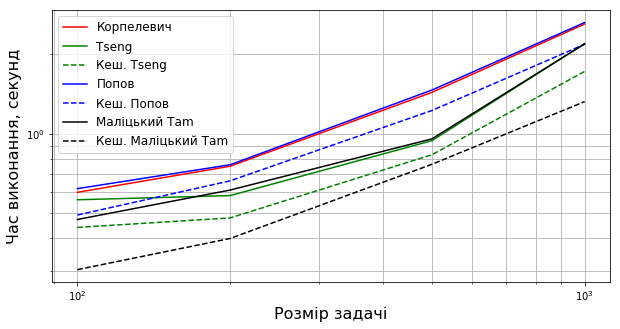

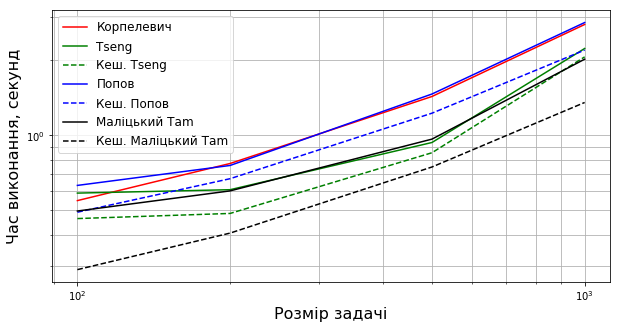

In [5]:
for _pass in range(3):
    iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

    for size in sizes:
        np.random.seed(_pass)
        M, q = src.generate_random_matrix(size)
        x_initial = np.ones(size)
        lambda_ = 0.4 / np.linalg.norm(M)

        _, iters['Корпелевич'][size], times['Корпелевич'][size] = \
            src.korpelevich(x_initial, lambda_, tolerance,
                            operator=lambda x: M.dot(x) + q,
                            projector=ProjectionOntoProbabilitySymplex)

        _, iters['Tseng'][size], times['Tseng'][size] = \
            src.tseng(x_initial, lambda_, tolerance,
                      operator=lambda x: M.dot(x) + q,
                      projector=ProjectionOntoProbabilitySymplex)

        _, iters['Кеш. Tseng'][size], times['Кеш. Tseng'][size] = \
            src.cached_tseng(x_initial, lambda_, tolerance,
                             operator=lambda x: M.dot(x) + q,
                             projector=ProjectionOntoProbabilitySymplex)

        _, iters['Попов'][size], times['Попов'][size] = \
            src.popov(x_initial, x_initial, lambda_, tolerance,
                      operator=lambda x: M.dot(x) + q,
                      projector=ProjectionOntoProbabilitySymplex)

        _, iters['Кеш. Попов'][size], times['Кеш. Попов'][size] = \
            src.cached_popov(x_initial, x_initial, lambda_, tolerance,
                             operator=lambda x: M.dot(x) + q,
                             projector=ProjectionOntoProbabilitySymplex)

        _, iters['Маліцький Tam'][size], times['Маліцький Tam'][size] = \
            src.malitskyi_tam(x_initial, x_initial, lambda_, tolerance,
                              operator=lambda x: M.dot(x) + q,
                              projector=ProjectionOntoProbabilitySymplex)
        
        _, iters['Кеш. Маліцький Tam'][size], times['Кеш. Маліцький Tam'][size] = \
            src.cached_malitskyi_tam(x_initial, x_initial, lambda_, tolerance,
                                     operator=lambda x: M.dot(x) + q,
                                     projector=ProjectionOntoProbabilitySymplex)

    src.save_values_to_table(times, sizes, fn=f'2/time-{_pass}', tp='time')
    src.save_values_to_table(iters, sizes, fn=f'2/iter-{_pass}', tp='iter')

    src.save_values_to_image(times,
                             sizes,
                             fn=f'2/time-{_pass}',
                             styles=('r-', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                             #styles=('c-', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                             title='Час виконання, секунд')

# Друга задача, адаптивні алгоритми

In [6]:
tolerance = 1e-3
sizes = (100, 200, 500, 1000)
algos = ('Адапт. Корпелевич', 'Кеш. адапт. Корпелевич', 'Адапт. Tseng',
         'Кеш. адапт. Tseng', 'Адапт. Попов', 'Кеш. адапт. Попов',
         'Адапт. Маліцький Tam', 'Кеш. адапт. Маліцький Tam')

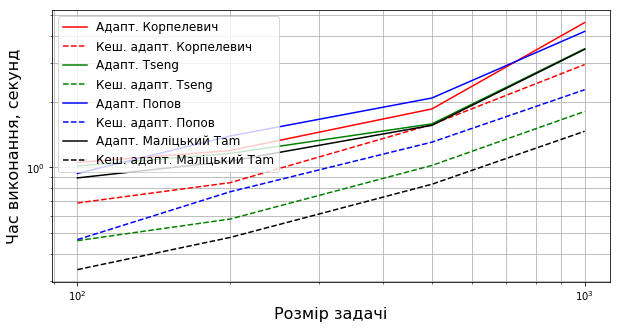

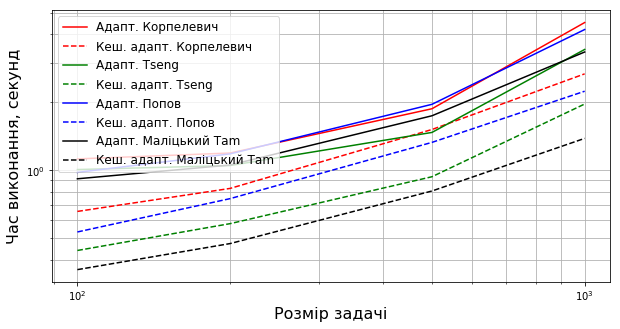

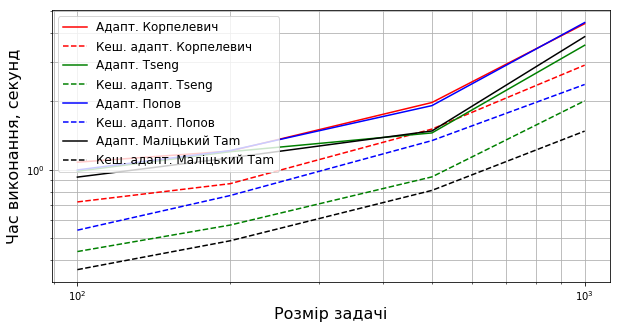

In [7]:
for _pass in range(3):
    iters, times = {algo: {} for algo in algos}, {algo: {} for algo in algos}

    for size in sizes:
        np.random.seed(_pass)
        M, q = src.generate_random_matrix(size)
        x_initial = np.ones(size)
        lambda_initial = 0.4 / np.linalg.norm(M)
        tau = 0.4

        _, iters['Адапт. Корпелевич'][size], times['Адапт. Корпелевич'][size] = \
            src.adaptive_korpelevich(x_initial, tau, lambda_initial, tolerance,
                                     operator=lambda x: M.dot(x) + q,
                                     projector=ProjectionOntoProbabilitySymplex)

        _, iters['Кеш. адапт. Корпелевич'][size], times['Кеш. адапт. Корпелевич'][size] = \
            src.cached_adaptive_korpelevich(x_initial, tau, lambda_initial, tolerance,
                                            operator=lambda x: M.dot(x) + q,
                                            projector=ProjectionOntoProbabilitySymplex)

        _, iters['Адапт. Tseng'][size], times['Адапт. Tseng'][size] = \
            src.adaptive_tseng(x_initial, tau, lambda_initial, tolerance,
                               operator=lambda x: M.dot(x) + q,
                               projector=ProjectionOntoProbabilitySymplex)

        _, iters['Кеш. адапт. Tseng'][size], times['Кеш. адапт. Tseng'][size] = \
            src.cached_adaptive_tseng(x_initial, tau, lambda_initial, tolerance,
                                      operator=lambda x: M.dot(x) + q,
                                      projector=ProjectionOntoProbabilitySymplex)

        _, iters['Адапт. Попов'][size], times['Адапт. Попов'][size] = \
            src.adaptive_popov(x_initial, x_initial, tau, lambda_initial, tolerance,
                               operator=lambda x: M.dot(x) + q,
                               projector=ProjectionOntoProbabilitySymplex)

        _, iters['Кеш. адапт. Попов'][size], times['Кеш. адапт. Попов'][size] = \
            src.cached_adaptive_popov(x_initial, x_initial, tau, lambda_initial, tolerance,
                                      operator=lambda x: M.dot(x) + q,
                                      projector=ProjectionOntoProbabilitySymplex)

        _, iters['Адапт. Маліцький Tam'][size], times['Адапт. Маліцький Tam'][size] = \
            src.adaptive_malitskyi_tam(x_initial, x_initial, tau,
                                       lambda_initial, lambda_initial, tolerance,
                                       operator=lambda x: M.dot(x) + q,
                                       projector=ProjectionOntoProbabilitySymplex)
        
        _, iters['Кеш. адапт. Маліцький Tam'][size], times['Кеш. адапт. Маліцький Tam'][size] = \
            src.cached_adaptive_malitskyi_tam(x_initial, x_initial, tau,
                                              lambda_initial, lambda_initial, tolerance,
                                              operator=lambda x: M.dot(x) + q,
                                              projector=ProjectionOntoProbabilitySymplex)

    src.save_values_to_table(times, sizes, fn=f'2/adapt/time-{_pass}', tp='time')
    src.save_values_to_table(iters, sizes, fn=f'2/adapt/iter-{_pass}', tp='iter')

    src.save_values_to_image(times,
                             sizes,
                             fn=f'2/adapt/time-{_pass}',
                             styles=('r-', 'r--', 'g-', 'g--', 'b-', 'b--', 'k-', 'k--'),
                             # styles=('c-', 'c--', 'm-', 'm--', 'y-', 'y--', 'w-', 'w--'),
                             title='Час виконання, секунд')